In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('data/customers.csv', sep=';')
df = df.drop(columns=['duration', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'contact'])
df.head()

,age,job,marital,education,default,balance,housing,loan,y
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,47,blue-collar,married,unknown,no,1506,yes,no,no
4,33,unknown,single,unknown,no,1,no,no,no


Lets start small. We will take only data related to the client and their banking habits and see how our model performs with these features, we can add other features as we progress.

In [19]:
X = df.iloc[:, :-1].values
X

array([[58, 'management', 'married', ..., 2143, 'yes', 'no'],
       [44, 'technician', 'single', ..., 29, 'yes', 'no'],
       [33, 'entrepreneur', 'married', ..., 2, 'yes', 'yes'],
       ...,
       [72, 'retired', 'married', ..., 5715, 'no', 'no'],
       [57, 'blue-collar', 'married', ..., 668, 'no', 'no'],
       [37, 'entrepreneur', 'married', ..., 2971, 'no', 'no']],
      dtype=object)

In [20]:
y = df.iloc[:, -1].values
y

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

## Encoding categorical data

How do we want to encode this?

One-hot encoding:
- job
- marital

Ordinal encoding:
- education
- default
- housing
- loan

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

nominal = [1, 2]
ordinal = [3, 4, 6, 7]

ct = ColumnTransformer(
    transformers=[
        ('onehot_encoder', OneHotEncoder(), nominal),
        ('ordinal_encoder', OrdinalEncoder(), ordinal)
    ],
    remainder='passthrough'
)

X = np.array(ct.fit_transform(X))
pd.DataFrame(X).to_csv('data/X_encoded.csv')
X

array([[0.0, 0.0, 0.0, ..., 0.0, 58, 2143],
       [0.0, 0.0, 0.0, ..., 0.0, 44, 29],
       [0.0, 0.0, 1.0, ..., 1.0, 33, 2],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 72, 5715],
       [0.0, 1.0, 0.0, ..., 0.0, 57, 668],
       [0.0, 0.0, 1.0, ..., 0.0, 37, 2971]], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)
y

array([0, 0, 0, ..., 1, 0, 0])

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
np.bincount(y_train)

array([31929,  4239])

In [25]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [26]:
np.bincount(y_train)

array([31929, 31929])

## Distribution

In [27]:
df.describe().round()

,age,balance
count,45211.0,45211.0
mean,41.0,1362.0
std,11.0,3045.0
min,18.0,-8019.0
25%,33.0,72.0
50%,39.0,448.0
75%,48.0,1428.0
max,95.0,102127.0


Mean: 40.94
Std: 10.62


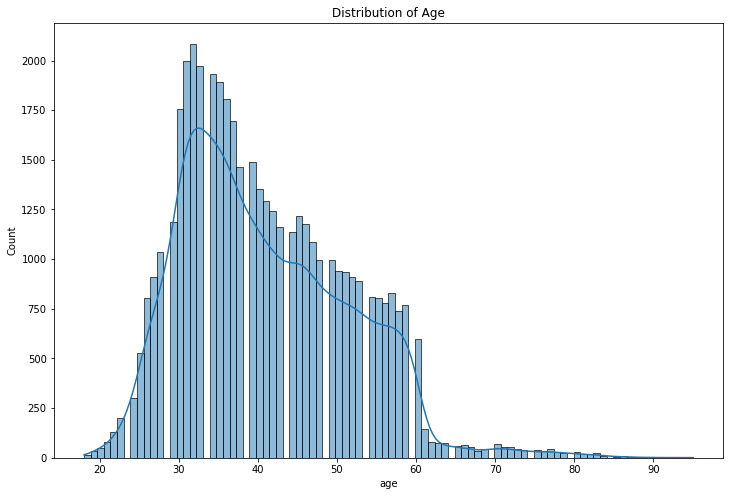

In [28]:
print('Mean: {:.2f}'.format(df.age.mean()))
print('Std: {:.2f}'.format(df.age.std()))

plt.figure(figsize=(12, 8))
plt.title('Distribution of Age')
sns.histplot(data=df, x='age', kde=True);

Mean: 1362.27
Std: 3044.77


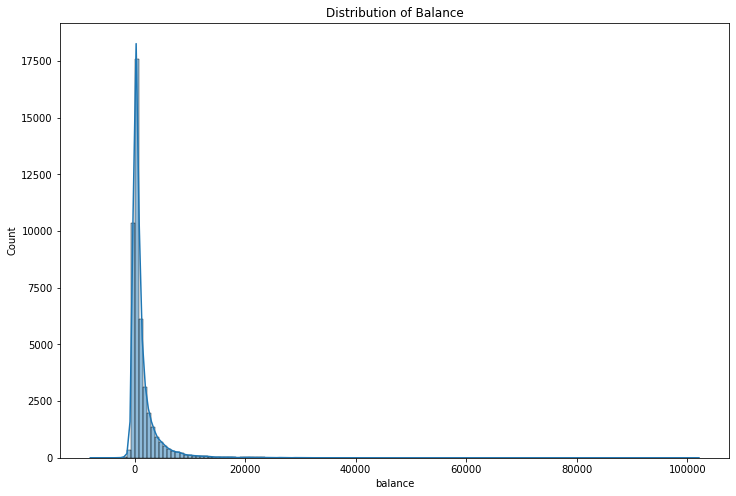

In [29]:
print('Mean: {:.2f}'.format(df.balance.mean()))
print('Std: {:.2f}'.format(df.balance.std()))

plt.figure(figsize=(12, 8))
plt.title('Distribution of Balance')
sns.histplot(data=df, x='balance', kde=True, bins=150);

Looking at the distribution of our data, neither of the features look normally distributed so normalization may be the better option however, normalization does not work well with outliers and as we can see with our balance feature, we have extreme outliers. Lets try both and see how it impacts our model.

## Standardization (Standard Scaler)

In [30]:
from sklearn.preprocessing import StandardScaler

stand = StandardScaler()
X_train[:, -2:] = stand.fit_transform(X_train[:, -2:])
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.9483338 , -0.48088508],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.77414859, -0.3796314 ],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.33868558, -0.38883628],
       ...,
       [ 0.50401872,  0.        ,  0.        , ...,  0.        ,
        -1.01019978, -0.42304405],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.92442445, -0.42596451],
       [ 0.42805592,  0.        ,  0.        , ...,  0.        ,
         0.9608654 , -0.25707404]])

In [31]:
X_test[:, -2:] = stand.transform(X_test[:, -2:])
X_test

array([[0.0, 1.0, 0.0, ..., 0.0, 0.07740776342235595,
        0.29201806647012146],
       [0.0, 0.0, 0.0, ..., 0.0, -0.3580552562474386, 0.1969009658346167],
       [1.0, 0.0, 0.0, ..., 0.0, -0.7935182759172331,
        -0.19768158712428377],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.2515929712902738,
        -0.07679082051012608],
       [0.0, 0.0, 0.0, ..., 0.0, -0.8806108798511921,
        -0.38730212968151584],
       [0.0, 0.0, 0.0, ..., 0.0, -1.1418886916530688,
        -0.05930154716746874]], dtype=object)

In [32]:
df_x_train_stand = pd.DataFrame(X_train[:, -2:], columns=['age', 'balance'])
df_x_test_stand = pd.DataFrame(X_test[:, -2:], columns=['age', 'balance'])

Standardized training age with mean -0.00 and a std of 1.00
Standardized testing age with mean -0.01 and a std of 0.93


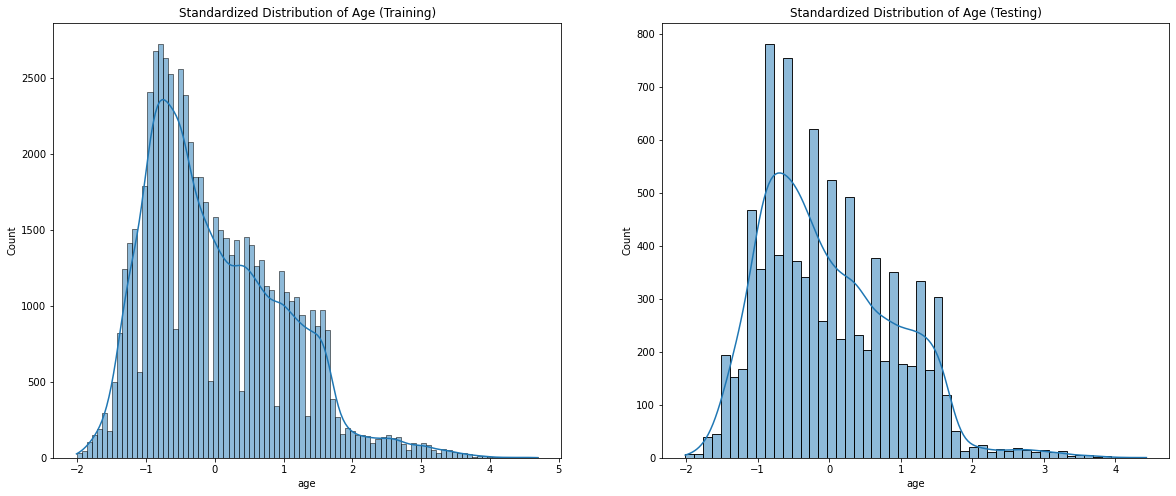

In [33]:
print('Standardized training age with mean {:.2f} and a std of {:.2f}'.format(df_x_train_stand.age.mean(), df_x_train_stand.age.std()))
print('Standardized testing age with mean {:.2f} and a std of {:.2f}'.format(df_x_test_stand.age.mean(), df_x_test_stand.age.std()))

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.histplot(data=df_x_train_stand, x='age', kde=True, ax=ax[0]).set_title('Standardized Distribution of Age (Training)')
sns.histplot(data=df_x_test_stand, x='age', kde=True, ax=ax[1]).set_title('Standardized Distribution of Age (Testing)');

Standardized training balance with mean -0.00 and a std of 1.00
Standardized testing balance with mean -0.07 and a std of 0.87


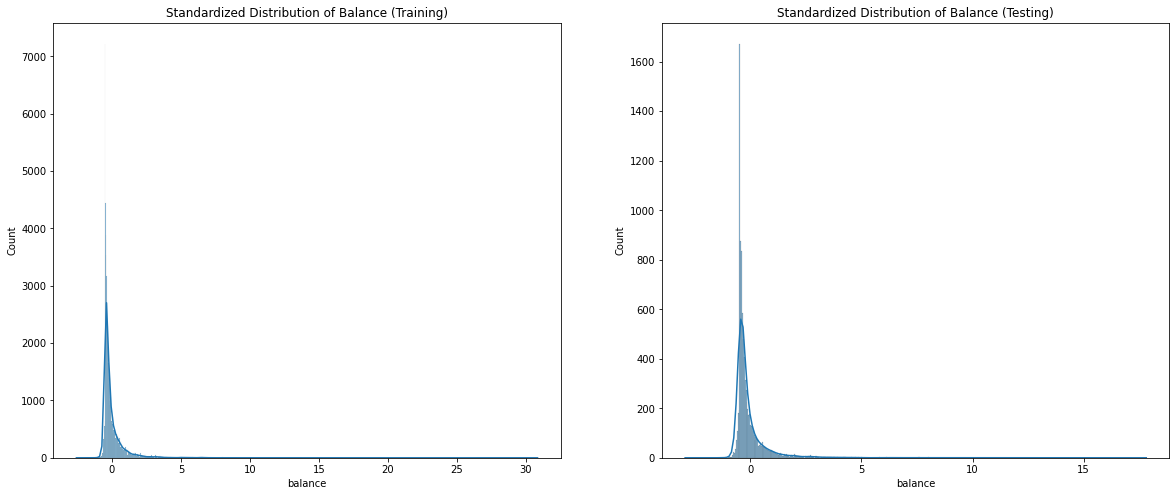

In [34]:
print('Standardized training balance with mean {:.2f} and a std of {:.2f}'.format(df_x_train_stand.balance.mean(), df_x_train_stand.balance.std()))
print('Standardized testing balance with mean {:.2f} and a std of {:.2f}'.format(df_x_test_stand.balance.mean(), df_x_test_stand.balance.std()))

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.histplot(data=df_x_train_stand, x='balance', kde=True, ax=ax[0]).set_title('Standardized Distribution of Balance (Training)')
sns.histplot(data=df_x_test_stand, x='balance', kde=True, ax=ax[1]).set_title('Standardized Distribution of Balance (Testing)');

We have now standardized age and balance, as we can see we have a mean of 0 and a standard deviation of 1 and the shape of our data remains unchanged.

In [35]:
pd.DataFrame(X_train).to_csv('data/train/x_train_stand.csv', index=False)
pd.DataFrame(y_train).to_csv('data/train/y_train_stand.csv', index=False)

pd.DataFrame(X_test).to_csv('data/test/x_test_stand.csv', index=False)
pd.DataFrame(y_test).to_csv('data/test/y_test_stand.csv', index=False)

## Normalization (MinMax Scaler)

In [36]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()

X_train[:, -2:] = norm.fit_transform(X_train[:, -2:])
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.44155844,
        0.0628315 ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.41558442,
        0.06585975],
       [0.        , 1.        , 0.        , ..., 0.        , 0.35064935,
        0.06558445],
       ...,
       [0.50401872, 0.        , 0.        , ..., 0.        , 0.14950722,
        0.06456138],
       [0.        , 0.        , 0.        , ..., 0.        , 0.16229781,
        0.06447404],
       [0.42805592, 0.        , 0.        , ..., 0.        , 0.44342712,
        0.06952513]])

In [37]:
X_test[:, -2:] = norm.transform(X_test[:, -2:])
X_test

array([[0.0, 1.0, 0.0, ..., 0.0, 0.31168831168831174,
        0.08594710664929249],
       [0.0, 0.0, 0.0, ..., 0.0, 0.24675324675324678,
        0.08310239139611283],
       [1.0, 0.0, 0.0, ..., 0.0, 0.18181818181818185,
        0.07130141134582561],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.33766233766233766, 0.0749169526676088],
       [0.0, 0.0, 0.0, ..., 0.0, 0.16883116883116886,
        0.06563033384109972],
       [0.0, 0.0, 0.0, ..., 0.0, 0.12987012987012989,
        0.07544001321416118]], dtype=object)

In [38]:
df_x_train_norm = pd.DataFrame(X_train[:, -2:], columns=['age', 'balance'])
df_x_test_norm = pd.DataFrame(X_test[:, -2:], columns=['age', 'balance'])

Normalized training age with mean 0.30 and a std of 0.15
Normalized testing age with mean 0.30 and a std of 0.14


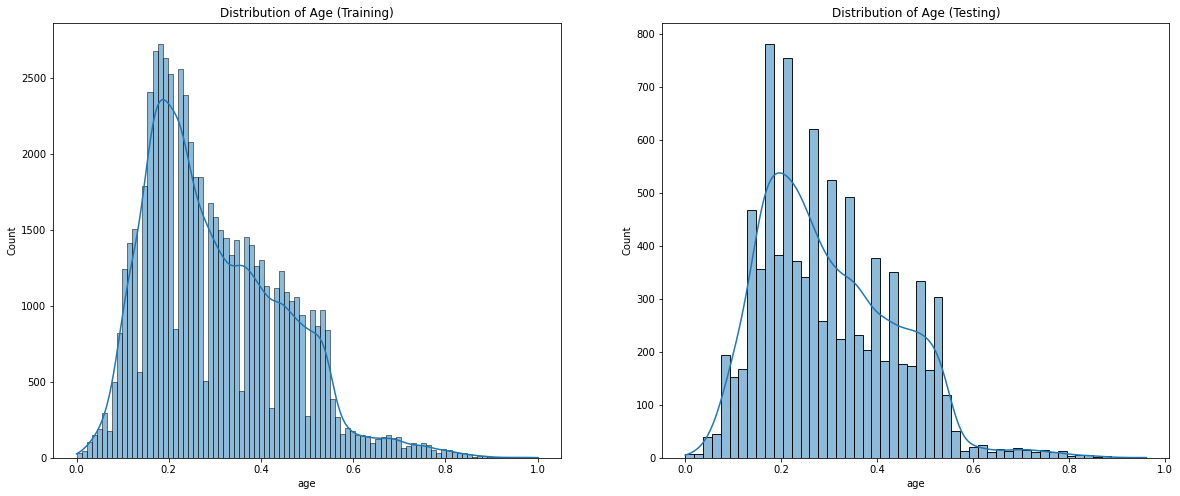

In [39]:
print('Normalized training age with mean {:.2f} and a std of {:.2f}'.format(df_x_train_norm.age.mean(), df_x_train_norm.age.std()))
print('Normalized testing age with mean {:.2f} and a std of {:.2f}'.format(df_x_test_norm.age.mean(), df_x_test_norm.age.std()))

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.histplot(data=df_x_train_norm, x='age', kde=True, ax=ax[0]).set_title('Distribution of Age (Training)')
sns.histplot(data=df_x_test_norm, x='age', kde=True, ax=ax[1]).set_title('Distribution of Age (Testing)');

Normalized training balance with mean 0.08 and a std of 0.03
Normalized testing balance with mean 0.08 and a std of 0.03


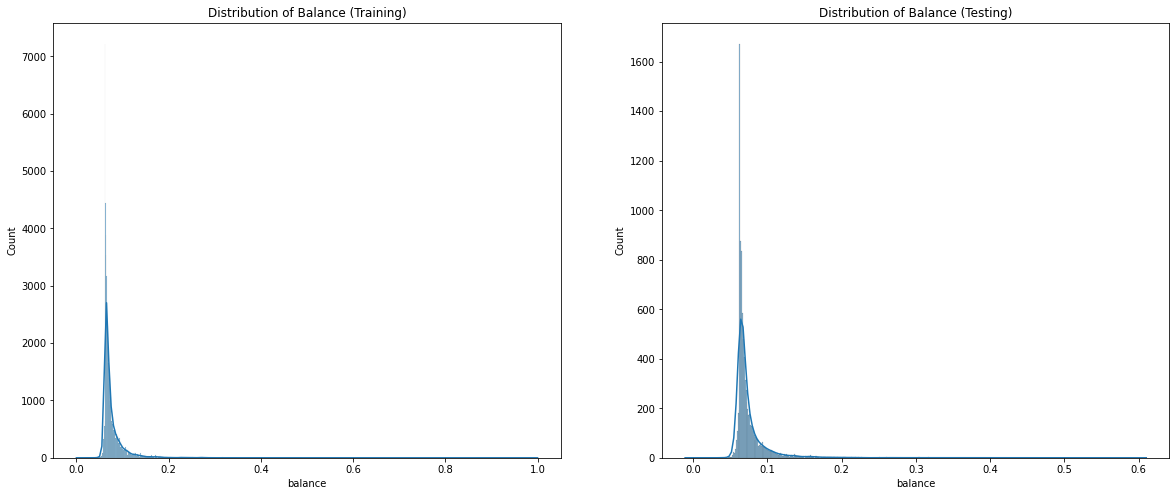

In [40]:
print('Normalized training balance with mean {:.2f} and a std of {:.2f}'.format(df_x_train_norm.balance.mean(), df_x_train_norm.balance.std()))
print('Normalized testing balance with mean {:.2f} and a std of {:.2f}'.format(df_x_test_norm.balance.mean(), df_x_test_norm.balance.std()))

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.histplot(data=df_x_train_norm, x='balance', kde=True, ax=ax[0]).set_title('Distribution of Balance (Training)')
sns.histplot(data=df_x_test_norm, x='balance', kde=True, ax=ax[1]).set_title('Distribution of Balance (Testing)');

We can see from normalizing, our features are now scaled between 0 and 1. In addition, the shape of our data remains unchanged and the mean and standard deviation is consistent throughout both our training and testing data.

In [41]:
pd.DataFrame(X_train).to_csv('data/train/x_train_norm.csv', index=False)
pd.DataFrame(y_train).to_csv('data/train/y_train_norm.csv', index=False)

pd.DataFrame(X_test).to_csv('data/test/x_test_norm.csv', index=False)
pd.DataFrame(y_test).to_csv('data/test/y_test_norm.csv', index=False)